### let's take a look at the mms slices and make sure they match what we were trying to make

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pyspedas
import pytplot
import datetime as dt
from scipy.constants import physical_constants

In [2]:
# Physical constants (for unit conversion and plasma freq calc.)
c = physical_constants["speed of light in vacuum"][0]  # m/s
e = physical_constants["elementary charge"][0]  # coulombs
m_e = physical_constants["electron mass"][0]  # kg
e_0 = physical_constants["vacuum electric permittivity"][0]  # Farads/m

In [3]:
# pick a (small) slices file to look at
filename = "/tigress/kendrab/analysis-notebooks/mms_data/mms_slices/2018-09-02T14-55-00_2018-09-03T03-03-00.h5"
chosen_slice = 257 # which short snippet to look at

# get the data
with h5py.File(filename, 'r') as file:
    B = file['B'][()]
    E = file['E'][()]
    time = file['time'][()]
    
print(B.shape)

(753, 4, 30)


In [4]:
# put time into thing you can plot against
time = np.vectorize(lambda x: dt.datetime.strptime(x.decode(), '%Y-%m-%dT%H:%M:%S.%f'))(time)

min_time = time[chosen_slice,0].strftime('%Y-%m-%d/%H:%M:%S.%f')
max_time = time[chosen_slice,-1].strftime('%Y-%m-%d/%H:%M:%S.%f')

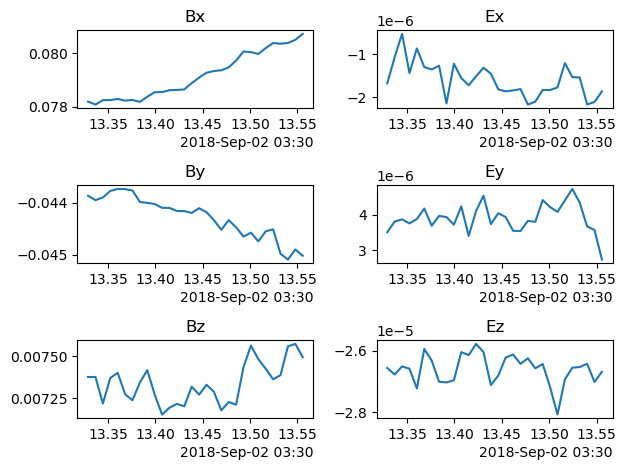

In [5]:
# plot the things
fig, ax = plt.subplots(nrows=3, ncols=2)

ax[0,0].plot(time[257], B[chosen_slice, 0])
ax[0,0].set(title="Bx")
ax[1,0].plot(time[257], B[chosen_slice, 1])
ax[1,0].set(title="By")
ax[2,0].plot(time[257], B[chosen_slice, 2])
ax[2,0].set(title="Bz")
ax[0,1].plot(time[257], E[chosen_slice, 0])
ax[0,1].set(title="Ex")
ax[1,1].plot(time[257], E[chosen_slice, 1])
ax[1,1].set(title="Ey")
ax[2,1].plot(time[257], E[chosen_slice, 2])
ax[2,1].set(title="Ez")
fig.tight_layout()
plt.show()

In [6]:
# get the data straight from pyspedas
timerange = [min_time, max_time]

pyspedas.mms.fpi(trange=timerange, probe='1', data_rate='brst', datatype='des-moms', time_clip=True,
                                varnames=["mms1_des_numberdensity_brst"]) 
pyspedas.mms.fgm(trange=timerange, probe='1', data_rate='brst', time_clip=True,
                                varnames=["mms1_fgm_b_gsm_brst_l2"])
pyspedas.mms.edp(trange=timerange, probe='1', data_rate='brst', time_clip=True,
                                varnames=["mms1_edp_dce_gse_brst_l2"]) 

Loading pydata/mms1/fpi/brst/l2/des-moms/2018/09/02/mms1_fpi_brst_l2_des-moms_20180902032953_v3.3.0.cdf
Time clip was applied to: mms1_des_numberdensity_brst
The name mms1_des_errorflags_brst is currently not in pytplot
The name mms1_des_compressionloss_brst is currently not in pytplot
The name mms1_des_pitchangdist_lowen_brst is currently not in pytplot
The name mms1_des_pitchangdist_miden_brst is currently not in pytplot
The name mms1_des_pitchangdist_highen_brst is currently not in pytplot
The name mms1_des_errorflags_brst_moms is currently not in pytplot
The name mms1_des_errorflags_brst_moms is currently not in pytplot
The name mms1_des_compressionloss_brst_moms is currently not in pytplot
The name mms1_des_compressionloss_brst_moms is currently not in pytplot
Problem reading the variable: mms1_des_compressionloss_brst_moms
The name mms1_dis_compressionloss_brst_moms is currently not in pytplot
The name mms1_dis_compressionloss_brst_moms is currently not in pytplot
Problem reading

['mms1_edp_dce_gse_brst_l2']

In [7]:
B_mms = pytplot.data_quants["mms1_fgm_b_gsm_brst_l2"][:,:3]
E_mms = pytplot.data_quants["mms1_edp_dce_gse_brst_l2"][:,:3]
n = pytplot.data_quants["mms1_des_numberdensity_brst"]  # cm^-3
# calculate plasma frequency
w_pe = np.sqrt((n*100**3)*e**2/e_0/m_e)  # converting to m^-3 then calculating

10-Aug-23 10:04:49: /home/kendrab/.conda/envs/pyspedas/lib/python3.7/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")



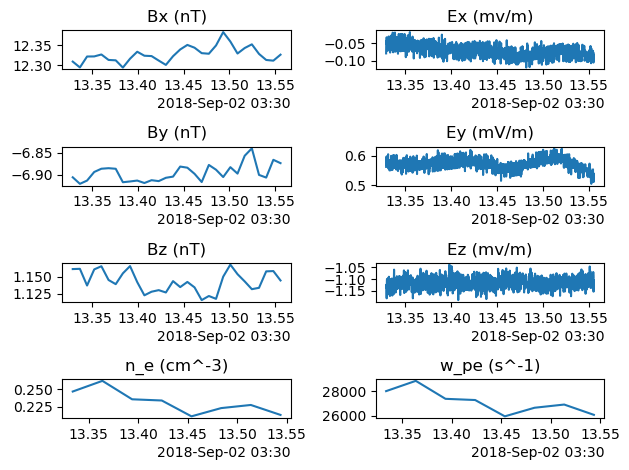

In [8]:
# plot the things
fig, ax = plt.subplots(nrows=4, ncols=2)

ax[0,0].plot(B_mms.time, B_mms.isel(v_dim=0))
ax[0,0].set(title="Bx (nT)")
ax[1,0].plot(B_mms.time, B_mms.isel(v_dim=1))
ax[1,0].set(title="By (nT)")
ax[2,0].plot(B_mms.time, B_mms.isel(v_dim=2))
ax[2,0].set(title="Bz (nT)")
ax[0,1].plot(E_mms.time, E_mms.isel(v_dim=0))
ax[0,1].set(title="Ex (mv/m)")
ax[1,1].plot(E_mms.time, E_mms.isel(v_dim=1))
ax[1,1].set(title="Ey (mV/m)")
ax[2,1].plot(E_mms.time, E_mms.isel(v_dim=2))
ax[2,1].set(title="Ez (mv/m)")
ax[3,0].plot(n.time, n)
ax[3,0].set(title='n_e (cm^-3)')
ax[3,1].plot(n.time, w_pe)
ax[3,1].set(title='w_pe (s^-1)')
fig.tight_layout()
plt.show()